Data Preprocessing

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scalecast.Forecaster import Forecaster
%matplotlib inline


motat = pd.read_csv('../Data/motatstation_weather_auckland_2016_2024.csv', index_col=['Date'], parse_dates=['Date'])
motat.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [154]:
motat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [155]:
print(motat.isnull().sum())


WDir(Deg)          0
WSpd(m/s)          0
GustDir(Deg)       0
GustSpd(m/s)       0
WindRun(Km)        0
Rain(mm)           0
Tdry(c)            0
Twet(c)            0
RH(%)              0
Tmax(c)            0
Tmin(c)            0
Tgmin(C)           0
ET10©              0
ET20©              0
ET100©             0
Pmsl(hPa)          0
Pstn(hPa)          0
Sun(Hrs)           0
Rad(MJ/m2)         0
Tavg               0
Evaporation(mm)    0
SoilMoist(%)       0
dtype: int64


In [156]:
motat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

<Axes: xlabel='Date'>

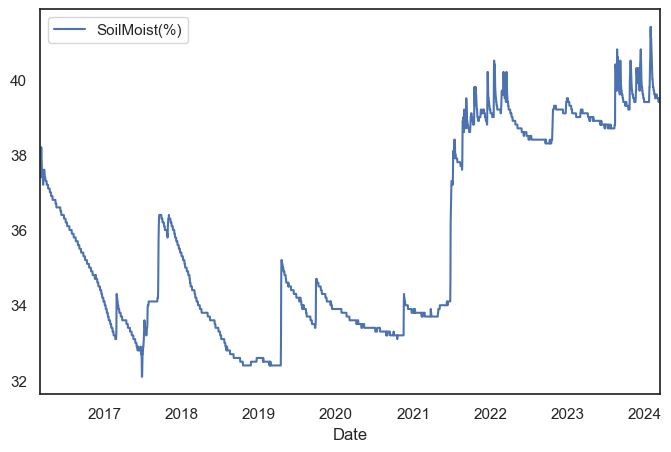

In [157]:
motat[['SoilMoist(%)']].plot(figsize=(8, 5))

In [158]:
motat.describe()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,...,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,191.282089,2.357047,172.194815,9.918496,246.424804,3.307860,15.721470,14.022736,82.628847,20.307428,...,16.564742,16.915609,17.454228,1015.911330,1013.994352,6.554610,14.269391,16.053073,2.660599,35.754712
std,100.172922,2.352322,98.542644,5.273735,106.417788,9.130599,3.883882,3.538058,11.813420,3.791832,...,3.678346,3.392831,2.456328,7.961636,7.944246,3.662955,7.384885,3.833088,1.588089,2.577080
min,0.000000,-42.590000,1.000000,-175.700000,0.000000,0.000000,1.400000,1.300000,44.000000,9.000000,...,5.600000,8.400000,12.100000,978.400000,976.600000,0.000000,0.610000,6.100000,0.000000,32.100000
25%,122.000000,1.100000,65.000000,7.700000,167.000000,0.000000,13.100000,11.500000,74.000000,17.200000,...,13.500000,14.000000,15.200000,1011.000000,1009.100000,3.800000,8.310000,13.050000,1.400000,33.600000
50%,197.000000,2.200000,194.000000,9.800000,229.000000,0.000000,15.900000,14.000000,83.000000,20.100000,...,17.400000,17.600000,18.200000,1016.500000,1014.500000,6.700000,12.900000,16.050000,2.400000,34.500000
75%,269.000000,3.600000,248.000000,11.800000,310.000000,2.600000,18.800000,16.800000,93.000000,23.400000,...,19.077500,19.186500,19.200000,1021.200000,1019.300000,9.300000,19.675000,19.200000,3.800000,38.700000
max,360.000000,11.400000,360.000000,26.300000,762.000000,215.200000,25.200000,24.000000,100.000000,30.100000,...,25.800000,25.100000,22.400000,1038.600000,1036.600000,14.000000,33.720000,25.250000,9.000000,41.400000


Lag Features

In [159]:
lag_size = [ 60] 

# Create lag features for 'Rainfall (mm)'
for i in lag_size:
    motat[f'Rainfall_lag_{i}'] = motat['Rain(mm)'].shift(i)


# # Create lag features for 'SoilTemp'
# for i in lag_size:
#     motat[f'Temp(c)_lag_{i}'] = motat['Tgmin(C)'].shift(i)

motat.dropna(inplace=True)  # Drop rows with NaN values in the lag features

Split Data

In [160]:
print(motat.columns)


Index(['WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(c)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)', 'SoilMoist(%)',
       'Rainfall_lag_60'],
      dtype='object')


In [161]:
from sklearn.model_selection import train_test_split

# Define features and target
X = motat.drop(columns=['SoilMoist(%)', 'Rainfall_lag_60', 'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)','Pmsl(hPa)', 'Pstn(hPa)'])
y = motat['SoilMoist(%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model

In [163]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping


lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)


# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = lstm_predictions.flatten()

c:\Users\Ying\.conda\envs\level8\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1096.7063 - val_loss: 791.1221
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 723.0318 - val_loss: 564.0542
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 514.6549 - val_loss: 376.5186
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 336.3601 - val_loss: 235.9650
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 212.5390 - val_loss: 152.0222
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 137.8023 - val_loss: 95.0141
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.9891 - val_loss: 57.3644
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6127 - val_loss: 30.6003
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.1020 - val_loss: 18.6481
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6099 - val_loss: 12.4601
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4972 - val_loss: 8.9706
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
train_lstm_predictions = lstm_model.predict(X_train_lstm)
train_lstm_predictions = train_lstm_predictions.flatten()

# Calculate evaluation metrics for the training set
# train_rmse = sqrt(mean_squared_error(y_train, train_lstm_predictions))
# train_mae = mean_absolute_error(y_train, train_lstm_predictions)
# train_mse = mean_squared_error(y_train, train_lstm_predictions)
# train_r2 = r2_score(y_train, train_lstm_predictions)

# # Print metrics for the training set
# print("Training Set - LSTM Root Mean Squared Error (RMSE):", train_rmse)
# print("Training Set - LSTM Mean Absolute Error (MAE):", train_mae)
# print("Training Set - LSTM Mean Squared Error (MSE):", train_mse)
# print("Training Set - LSTM R2 Score:", train_r2)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, lstm_predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, lstm_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, lstm_predictions)

# Calculate R2 score
r2 = r2_score(y_test, lstm_predictions)

# Print the metrics
print("LSTM Root Mean Squared Error (RMSE):", rmse)
print("LSTM Mean Absolute Error (MAE):", mae)
print("LSTM Mean Squared Error (MSE):", mse)
print("LSTM R2 Score:", r2)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM Root Mean Squared Error (RMSE): 2.6112479664363395
LSTM Mean Absolute Error (MAE): 2.379323442776998
LSTM Mean Squared Error (MSE): 6.818615942217917
LSTM R2 Score: 0.0013804600624746088


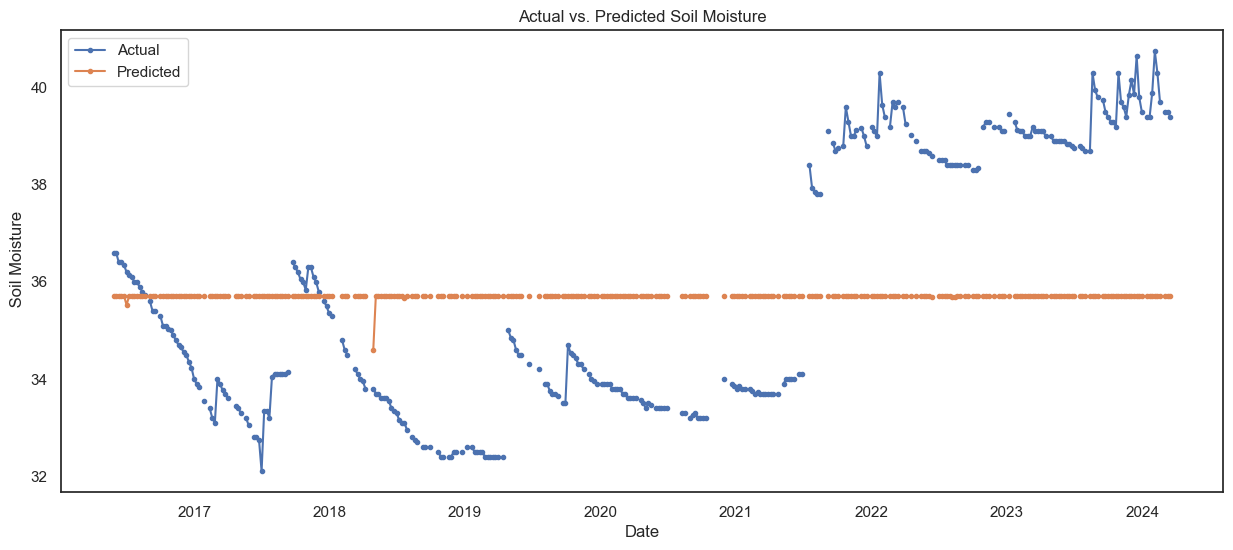

In [165]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': lstm_predictions}, index=X_test.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Soil Moisture')
ax.set_xlabel('Date')
ax.set_ylabel(' Soil Moisture')
ax.legend()
plt.savefig('rf_long_predict', dpi=300)

plt.show()

<Axes: >

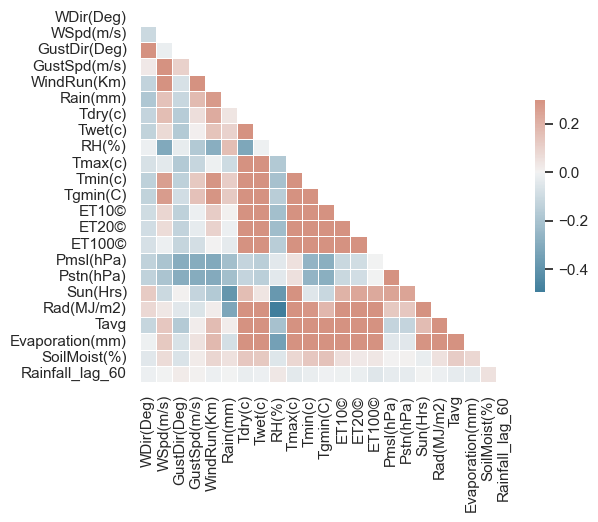

In [166]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = motat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})